In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,auc

In [43]:
train_df = pd.read_csv("train.csv")
train_df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,13829,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2.0,-1,0,unknown,no
1,22677,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3.0,-1,0,unknown,no
2,10541,30,management,single,secondary,no,135,no,no,cellular,14,aug,2.0,-1,0,unknown,no
3,13689,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1.0,-1,0,unknown,no
4,11304,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1.0,-1,0,unknown,no


In [44]:
test_df = pd.read_csv("test.csv")
test_df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,53608,32,management,single,tertiary,no,12569,no,no,cellular,1,jul,2,295,2,success,yes
1,51055,25,services,single,secondary,no,801,no,no,cellular,5,jun,2,-1,0,unknown,yes
2,52573,46,blue-collar,married,secondary,no,1728,yes,no,unknown,26,may,2,-1,0,unknown,no
3,50458,39,management,divorced,secondary,no,51,no,no,unknown,17,jun,2,-1,0,unknown,no
4,52272,31,services,single,tertiary,no,1626,no,no,unknown,31,jul,1,-1,0,unknown,no


In [45]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12870 entries, 0 to 12869
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         12870 non-null  int64  
 1   age        12870 non-null  int64  
 2   job        12870 non-null  object 
 3   marital    12870 non-null  object 
 4   education  12870 non-null  object 
 5   default    12870 non-null  object 
 6   balance    12870 non-null  int64  
 7   housing    11596 non-null  object 
 8   loan       12870 non-null  object 
 9   contact    12870 non-null  object 
 10  day        12870 non-null  int64  
 11  month      12870 non-null  object 
 12  campaign   11584 non-null  float64
 13  pdays      12870 non-null  int64  
 14  previous   12870 non-null  int64  
 15  poutcome   12870 non-null  object 
 16  y          12870 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.7+ MB


### initial analysis
- drop ID column
- we'll drop the poutcome column as is has more than 90% null values
- we'll fill the null values in ('job', 'education', 'contact') with the mode
- we'll have to encode each of ('job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y')

In [46]:
train_df.drop(columns=['ID'], inplace=True)

In [47]:
test_df.drop(columns=['ID'], inplace=True)

In [48]:
imputer_mode = SimpleImputer(strategy='most_frequent')

In [49]:
train_df['housing'] = imputer_mode.fit_transform(train_df[['housing']])[:,0]

In [50]:
imputer_median = SimpleImputer(strategy="median")

In [51]:
train_df['campaign'] = imputer_median.fit_transform(train_df[['campaign']])[:,0]

In [52]:
train_df = train_df.apply(LabelEncoder().fit_transform)

In [53]:
test_df = test_df.apply(LabelEncoder().fit_transform)

In [54]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12870 entries, 0 to 12869
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        12870 non-null  int64
 1   job        12870 non-null  int32
 2   marital    12870 non-null  int32
 3   education  12870 non-null  int32
 4   default    12870 non-null  int32
 5   balance    12870 non-null  int64
 6   housing    12870 non-null  int32
 7   loan       12870 non-null  int32
 8   contact    12870 non-null  int32
 9   day        12870 non-null  int64
 10  month      12870 non-null  int32
 11  campaign   12870 non-null  int64
 12  pdays      12870 non-null  int64
 13  previous   12870 non-null  int64
 14  poutcome   12870 non-null  int32
 15  y          12870 non-null  int32
dtypes: int32(10), int64(6)
memory usage: 1.1 MB


In [55]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4291 entries, 0 to 4290
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4291 non-null   int64
 1   job        4291 non-null   int32
 2   marital    4291 non-null   int32
 3   education  4291 non-null   int32
 4   default    4291 non-null   int32
 5   balance    4291 non-null   int64
 6   housing    4291 non-null   int32
 7   loan       4291 non-null   int32
 8   contact    4291 non-null   int32
 9   day        4291 non-null   int64
 10  month      4291 non-null   int32
 11  campaign   4291 non-null   int64
 12  pdays      4291 non-null   int64
 13  previous   4291 non-null   int64
 14  poutcome   4291 non-null   int32
 15  y          4291 non-null   int32
dtypes: int32(10), int64(6)
memory usage: 368.9 KB


In [56]:
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]

In [57]:
X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]

In [58]:
lr = LogisticRegression(penalty='l2', C=1.0, max_iter=100)
lr.fit(X_train, y_train)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
print(lr.score(X_train, y_train))

0.7036519036519037


In [60]:
print(lr.score(X_test, y_test))

0.7019342810533675


In [79]:
y_pred = lr.predict(X_test)

In [80]:
y_probs = lr.predict_proba(X_test)[:, 1]

In [84]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

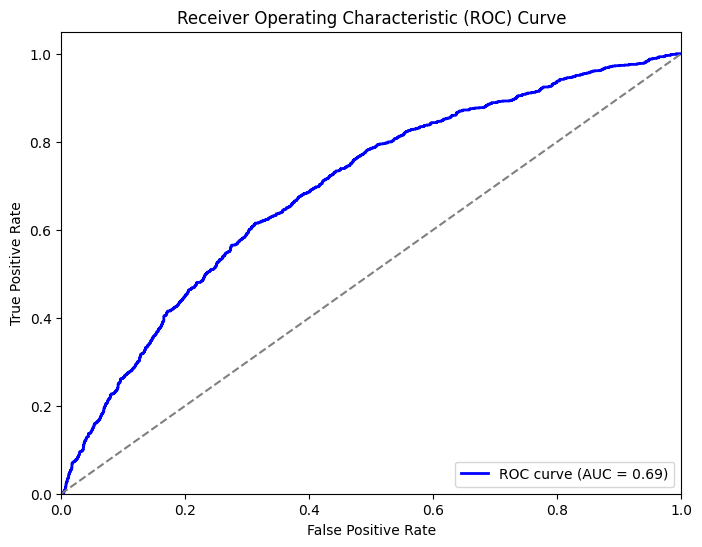

In [85]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<Axes: >

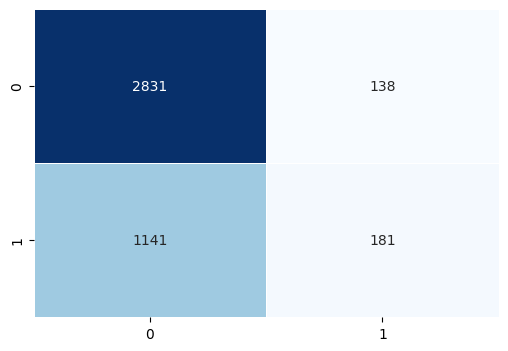

In [63]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.95      0.82      2969
           1       0.57      0.14      0.22      1322

    accuracy                           0.70      4291
   macro avg       0.64      0.55      0.52      4291
weighted avg       0.67      0.70      0.63      4291



In [65]:
lrs = LinearRegression()

In [87]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [88]:
print(knn.score(X_train, y_train))

0.7577311577311577


In [ ]:
print(knn.score(X_test, y_test))

0.6937776742018178


In [90]:
y_pred = knn.predict(X_test)

<Axes: >

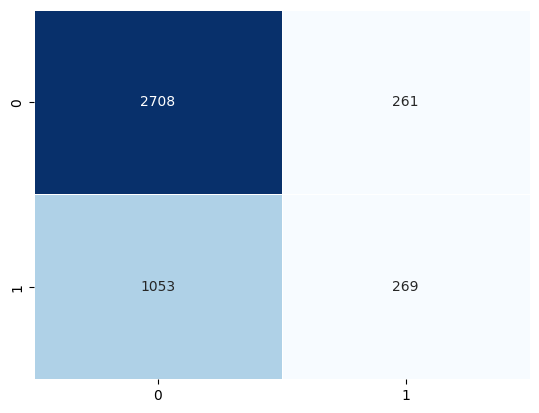

In [91]:
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)

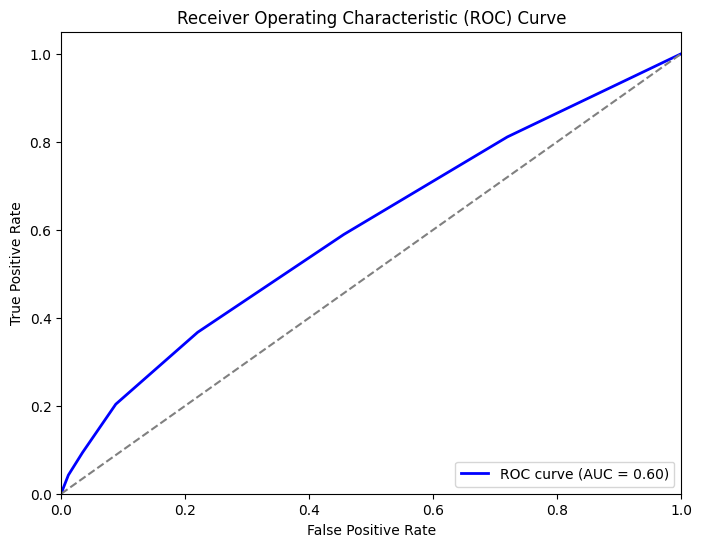

In [92]:
y_probs = knn.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.89      0.79      2969
           1       0.46      0.22      0.30      1322

    accuracy                           0.68      4291
   macro avg       0.59      0.55      0.54      4291
weighted avg       0.64      0.68      0.64      4291



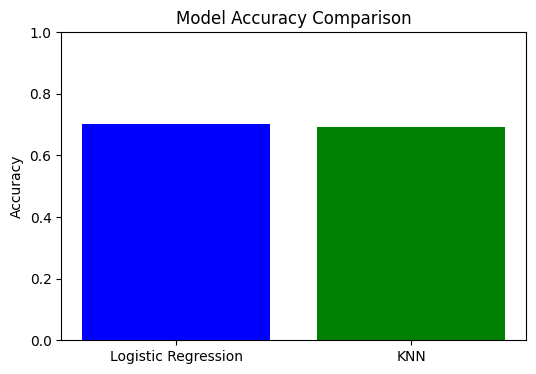

In [94]:
lr_accuracy = accuracy_score(y_test, lr.predict(X_test))
knn_accuracy = accuracy_score(y_test, knn.predict(X_test))
# Plot Accuracy Comparison
plt.figure(figsize=(6, 4))
models = ['Logistic Regression', 'KNN']
accuracies = [lr_accuracy, knn_accuracy]
plt.bar(models, accuracies, color=['blue', 'green'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()
